In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = list(range(7,16))
sex_ids = [2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]
location_ids = [163,179,214]

In [3]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [1] * len(age_group_ids)

In [4]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     'temporary_coverage_data_3_3_21.csv',
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['women of reproductive age','total population',np.nan])

# HEMOGLOBIN

In [5]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [6]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [7]:
# NOTE:
# This approach currently does not consider that new coverage
# applies to those who are slightly more anemic
# than the overall population due to their lack
# of access to fortification

effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.009040 -0.011892   
                                     0.5            -0.005295 -0.006721   
...                                                       ...       ...   
214         2      15           2024 0.5             0.132185  0.131851   
                                     0.8             0.311628  0.311496   
                                2025 0.2            -0.047258 -0.047794   
                                     0.5             0.132185  0.131851   
                                     0.8             0.311628  0.311496   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.012152 -0.013138   
                                     0.5            -0.006851 -0.007344   
...                                                       ...       ...   
214         2      15           2024 0.5             0.122230  0.139017   
                                     0.8             0.307693  0.314329   
                                2025 0.2            -0.063233 -0.036294   
                                     0.5             0.122230  0.139017   
                                     0.8             0.307693  0.314329   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.013834 -0.009072   
                                     0.5            -0.007692 -0.005311   
...                                                       ...       ...   
214         2      15           2024 0.5             0.137463  0.138767   
                                     0.8             0.313715  0.314230   
                                2025 0.2            -0.038788 -0.036696   
                                     0.5             0.137463  0.138767   
                                     0.8             0.313715  0.314230   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.010665 -0.011588   
                                     0.5            -0.006107 -0.006569   
...                                                       ...       ...   
214         2      15           2024 0.5             0.127423  0.134453   
                                     0.8             0.309746  0.312525   
                                2025 0.2            -0.054901 -0.043618   
                                     0.5             0.127423  0.134453   
                                     0.8             0.309746  0.312525   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [8]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_wra/mean_hgb_wra.csv')
mean_hgb = mean_hgb.reset_index().rename(columns={'year_id':'year'}).set_index(['location_id','sex_id','age_group_id','coverage_level','year'])
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0      draw_1  \
location_id sex_id age_group_id coverage_level year                             
163         2      7            baseline       NaN     117.010288  118.180960   
                   8            baseline       NaN     118.250651  118.263222   
                   9            baseline       NaN     117.623860  117.229773   
                   10           baseline       NaN     118.192074  118.613138   
                   11           baseline       NaN     118.133772  118.357329   
...                                                           ...         ...   
214         2      15           0.5            2024.0  125.008670  127.977480   
                                0.8            2024.0  126.026801  128.384025   
                                0.2            2025.0  123.990539  127.570936   
                                0.5            2025.0  125.008670  127.977480   
                                0.8            2025.0  126.026801  128.384025   

                                                          draw_10    draw_100  \
location_id sex_id age_group_id coverage_level year                             
163         2      7            baseline       NaN     117.835650  117.237190   
                   8            baseline       NaN     117.434865  118.585049   
                   9            baseline       NaN     117.366309  117.024725   
                   10           baseline       NaN     118.176368  117.493834   
                   11           baseline       NaN     118.545886  117.737803   
...                                                           ...         ...   
214         2      15           0.5            2024.0  123.133525  119.167095   
                                0.8            2024.0  123.499216  119.451694   
                                0.2            2025.0  122.767834  118.882495   
                                0.5            2025.0  123.133525  119.167095   
                                0.8            2025.0  123.499216  119.451694   

                                                         draw_101    draw_102  \
location_id sex_id age_group_id coverage_level year                             
163         2      7            baseline       NaN     116.418528  117.445135   
                   8            baseline       NaN     118.185030  117.776712   
                   9            baseline       NaN     117.077667  117.315521   
                   10           baseline       NaN     117.451161  118.951948   
                   11           baseline       NaN     117.958852  118.591075   
...                                                           ...         ...   
214         2      15           0.5            2024.0  126.762463  122.617024   
                                0.8            2024.0  127.407019  123.248920   
                                0.2            2025.0  126.117907  121.985128   
                                0.5            2025.0  126.762463  122.617024   
                                0.8            2025.0  127.407019  123.248920   

                                                         draw_103    draw_104  \
location_id sex_id age_group_id coverage_level year                             
163         2      7            baseline       NaN     118.428976  117.230409   
                   8            baseline       NaN     118.268008  117.730525   
                   9            baseline       NaN     116.980113  116.864172   
                   10           baseline       NaN     117.498771  117.491441   
                   11           baseline       NaN     117.672633  118.615490   
...                                                           ...         ...   
214         2      15           0.5            2024.0  121.401309  124.058081   
                                0.8            2024.0  121.534541  124.745691   
                                0.2            2025.0  121.268077  123.370471   
      

In [9]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
hgb_sd = (hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index())
hgb_sd.to_csv('anemia_files_wra/sd_hgb_wra.csv')
hgb_sd.head()

,location_id,sex_id,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,163,2,7,16.232815,16.861857,17.807394,17.172007,16.530747,17.089487,16.817642,...,16.919322,16.875458,16.310396,17.531593,16.316476,17.139056,16.810648,16.063830,17.231543,16.826965
1,163,2,8,16.324923,16.303103,16.529796,16.555410,16.526651,16.943011,16.671821,...,16.670794,16.841863,17.213154,16.755587,17.587763,16.453598,16.550523,16.366658,16.726247,16.415682
2,163,2,9,16.339382,16.473878,16.764061,16.559954,16.782945,17.075298,16.684596,...,16.356952,16.753604,16.821949,17.264279,16.511237,16.657279,16.477109,16.886501,17.176739,17.207513
3,163,2,10,16.679102,17.005423,16.698849,16.826905,17.018209,16.937699,17.021107,...,16.642163,16.796351,16.571631,16.882139,16.933626,17.154732,16.925517,17.068923,16.659790,16.593173
4,163,2,11,17.083605,16.949877,16.535781,17.115116,16.018143,16.663800,16.447880,...,16.775011,17.228886,17.311730,16.705214,17.024880,16.824618,17.173916,17.055965,16.559953,17.320888


In [10]:
# get age-specific fertility rate
get_covariate_estimates(13, 
                               location_id=location_ids,
                               age_group_id=age_group_ids,
                               sex_id=sex_ids,
                               year_id=2019,
                               gbd_round_id=6,
                               decomp_step='step4').to_csv('anemia_files_wra/asfr.csv')


# get still birth to live birth ratio (not age-specific)
still = get_covariate_estimates(2267, 
                                location_id=location_ids,
                                year_id=2019,
                                gbd_round_id=6,
                                decomp_step='step4').to_csv('anemia_files_wra/still.csv')

In [11]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [12]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_wra/anemia_prev_wra.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.003211   
                                              0.8             0.008006   
                                     draw_999 0.2            -0.000666   
                                              0.5             0.001740   
                                              0.8             0.004176   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.003006   
                                              0.8             0.007378   
                                     draw_999 0.2            -0.001451   
                                              0.5             0.003737   
                                              0.8             0.008844   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.000089   
                                              0.8             0.000218   
                                     draw_999 0.2            -0.000125   
                                              0.5             0.000318   
                                              0.8             0.000746   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.006306   
                                              0.8             0.015602   
                                     draw_999 0.2            -0.002241   
                                              0.5             0.005795   
                                              0.8             0.013766   

                                                              mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level              
163         7            2      2021 draw_0   0.2              0

In [13]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [14]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [15]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_counts_averted.head()

draw                                   draw_0        draw_1       draw_10  \
location_id coverage_level year                                             
163         0.2            2021      0.000000      0.000000      0.000000   
            0.5            2021      0.000000      0.000000      0.000000   
            0.8            2021      0.000000      0.000000      0.000000   
            0.2            2022 -29106.503629 -15085.052313 -15673.443505   
            0.5            2022 -17040.317074  -8523.343710  -8716.220861   

draw                                draw_100      draw_101      draw_102  \
location_id coverage_level year                                            
163         0.2            2021     0.000000      0.000000      0.000000   
            0.5            2021     0.000000      0.000000      0.000000   
            0.8            2021     0.000000      0.000000      0.000000   
            0.2            2022 -9400.462661 -27785.459697 -26429.438081   
            0.5            2022 -5416.672088 -15487.082003 -14782.181792   

draw                                draw_103      draw_104      draw_105  \
location_id coverage_level year                                            
163         0.2            2021     0.000000      0.000000      0.000000   
            0.5            2021     0.000000      0.000000      0.000000   
            0.8            2021     0.000000      0.000000      0.000000   
            0.2            2022 -5754.107531 -17200.170807 -15710.274149   
            0.5            2022 -3190.581014 -10262.501888  -8768.583426   

draw                                 draw_106  ...      draw_990  \
location_id coverage_level year                ...                 
163         0.2            2021      0.000000  ...      0.000000   
            0.5            2021      0.000000  ...      0.000000   
            0.8            2021      0.000000  ...      0.000000   
            0.2            2022 -38545.538983  ... -18712.916824   
            0.5            2022 -21547.354910  ... -10514.917692   

draw                                 draw_991      draw_992      draw_993  \
location_id coverage_level year                                             
163         0.2            2021      0.000000      0.000000      0.000000   
            0.5            2021      0.000000      0.000000      0.000000   
            0.8            2021      0.000000      0.000000      0.000000   
            0.2            2022 -19598.964584 -34023.227591 -36635.590616   
            0.5            2022 -10815.884143 -19202.350199 -20807.845065   

draw                                 draw_994      draw_995      draw_996  \
location_id coverage_level year                                             
163         0.2            2021      0.000000      0.000000      0.000000   
            0.5            2021      0.000000      0.000000      0.000000   
            0.8            2021      0.000000      0.000000      0.000000   
            0.2            2022 -11827.288786 -28942.933450 -26800.872721   
            0.5            2022  -6770.831810 -15813.918035 -15085.481883   

draw                                 draw_997      draw_998      draw_999  
location_id coverage_level year                                            
163         0.2            2021      0.000000      0.000000      0.000000  
            0.5            2021      0.000000      0.000000      0.000000  
            0.8            2021      0.000000      0.000000      0.000000  
            0.2            2022 -15160.258135 -11454.050953 -14570.371620  
            0.5            2022  -8556.494746  -6605.301686  -8123.961178  

[5 rows x 1000 columns]

In [16]:
anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -6.280231 -3.254861 -3.381816 -2.028312   
            0.5            2022 -3.676743 -1.839059 -1.880675 -1.168741   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -5.995193 -5.702608 -1.241548 -3.711234   
            0.5            2022 -3.341605 -3.189511 -0.688423 -2.214312   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
163         0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022 -3.389763 -8.316866  ... -4.037635 -4.228815   
            0.5            2022 -1.891973 -4.649214  ... -2.268775 -2.333714   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -7.341099 -7.904761 -2.551942 -6.244938   
            0.5            2022 -4.143239 -4.489652 -1.460924 -3.412126   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
163         0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022 -5.782751 -3.271087 -2.471409 -3.143809  
            0.5            2022 -3.254953 -1.846211 -1.425208 -1.752885  

[5 rows x 1000 columns]

In [51]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,1648.044374,1527.160131,1265.674924,1554.341027,1286.920146,1459.132145,1617.330958,1238.704420,1639.631445,1022.995656,...,1246.385955,1520.507539,1505.262585,1368.586206,1400.305859,1496.696733,728.304694,1181.105742,1171.923801,1147.538967
179,566.721354,538.308844,418.489347,555.039931,483.888364,591.979452,587.250510,471.151118,545.911204,391.292829,...,449.773980,571.103035,526.603786,497.725780,472.672868,559.514633,257.208190,404.349901,472.631728,413.749814
214,915.817240,915.730263,757.123599,874.157038,851.822320,979.756979,817.247480,825.213709,1105.693206,620.292992,...,745.357349,1066.477075,921.397545,917.651190,891.211989,1076.196764,586.477330,643.923471,784.022890,888.326458


In [53]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=1,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
163          3           192       0.743901
179          3           192       0.270537
214          3           192       0.341543
dtype: float64

In [56]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -0.381072 -0.213132 -0.267195 -0.130493   
            0.5            2022 -0.223097 -0.120423 -0.148591 -0.075192   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -0.465856 -0.390822 -0.076765 -0.299606   
            0.5            2022 -0.259659 -0.218590 -0.042565 -0.178760   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
163         0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022 -0.206739 -0.812991  ... -0.323947 -0.278119   
            0.5            2022 -0.115390 -0.454471  ... -0.182028 -0.153483   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -0.487696 -0.577586 -0.182242 -0.417248   
            0.5            2022 -0.275250 -0.328050 -0.104329 -0.227977   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
163         0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022 -0.794002 -0.276951 -0.210885 -0.273961  
            0.5            2022 -0.446922 -0.156312 -0.121613 -0.152752  

[5 rows x 1000 columns]

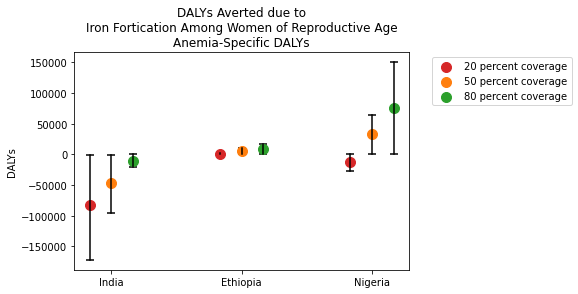

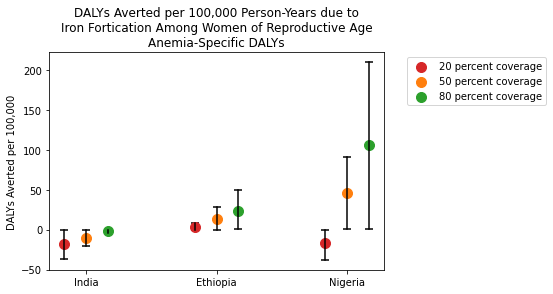

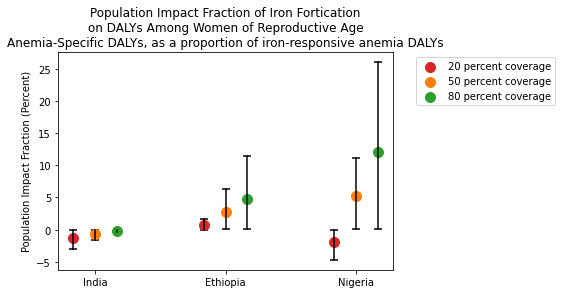

In [57]:
make_india_ethiopia_nigeria_plots(
    anemia_counts_averted, 
    'Iron', 
    'counts', 
    coverage_levels, 'Anemia-Specific DALYs', True)

make_india_ethiopia_nigeria_plots(
    anemia_rates_averted, 
    'Iron', 
    'rates', 
    coverage_levels, 'Anemia-Specific DALYs', True)

make_india_ethiopia_nigeria_plots(
    anemia_pifs, 
    'Iron', 
    'pifs', 
    coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs', True)

# MATERNAL DISORDERS

In [21]:
rr = get_draws('rei_id',
                 95,
                 source='rr',
                 location_id=location_ids,
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 gbd_round_id=6,
                 decomp_step='step4'
                 )
rr = rr.loc[rr.cause_id==367].set_index(['sex_id','age_group_id'])
rr = rr.drop(columns=[c for c in rr.columns if 'draw' not in c])
rr

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v106/lib/python3.7/site-packages/get_draws/sources/rr.py:256: UserWarning: RRs draws returned for rei_id = 95 have location_id(s) = 1 where 163, 179, 214 were requested.
  ", ".join(str(hf) for hf in hdf_filters['location_id'])


draw_0    draw_1    draw_2    draw_3    draw_4  \
sex_id age_group_id                                                     
2      8             1.212408  1.350076  1.086644  1.219068  1.261495   
       13            1.212408  1.350076  1.086644  1.219068  1.261495   
       11            1.212408  1.350076  1.086644  1.219068  1.261495   
       10            1.212408  1.350076  1.086644  1.219068  1.261495   
       9             1.212408  1.350076  1.086644  1.219068  1.261495   
       12            1.212408  1.350076  1.086644  1.219068  1.261495   
       14            1.212408  1.350076  1.086644  1.219068  1.261495   
       7             1.212408  1.350076  1.086644  1.219068  1.261495   
       15            1.212408  1.350076  1.086644  1.219068  1.261495   

                       draw_5    draw_6    draw_7   draw_8    draw_9  ...  \
sex_id age_group_id                                                   ...   
2      8             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       13            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       11            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       10            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       9             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       12            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       14            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       7             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       15            1.286287  1.092801  1.212885  1.19206  1.194871  ...   

                     draw_990  draw_991  draw_992  draw_993  draw_994  \
sex_id age_group_id                                                     
2      8             1.189681  1.315712   1.28604  1.257695  1.216908   
       13            1.189681  1.315712   1.28604  1.257695  1.216908   
       11            1.189681  1.315712   1.28604  1.257695  1.216908   
       10            1.189681  1.315712   1.28604  1.257695  1.216908   
       9             1.189681  1.315712   1.28604  1.257695  1.216908   
       12            1.189681  1.315712   1.28604  1.257695  1.216908   
       14            1.189681  1.315712   1.28604  1.257695  1.216908   
       7             1.189681  1.315712   1.28604  1.257695  1.216908   
       15            1.189681  1.315712   1.28604  1.257695  1.216908   

                     draw_995  draw_996  draw_997  draw_998  draw_999  
sex_id age_group_id                                                    
2      8             1.177559  1.315347  1.221176  1.276526  1.243538  
       13            1.177559  1.315347  1.221176  1.276526  1.243538  
       11            1.177559  1.315347  1.221176  1.276526  1.243538  
       10            1.177559  1.315347  1.221176  1.276526  1.243538  
       9             1.177559  1.315347  1.221176  1.276526  1.243538  
       12            1.177559  1.315347  1.221176  1.276526  1.243538  
       14            1.177559  1.315347  1.221176  1.276526  1.243538  
       7             1.177559  1.315347  1.221176  1.276526  1.243538  
       15            1.177559  1.315347  1.221176  1.276526  1.243538  

[9 rows x 1000 columns]

In [22]:
baseline_hgb = get_draws('modelable_entity_id',
                    10487,
                    source='epi',
                    location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    year_id=2019,
                    gbd_round_id=6,
                    decomp_step='step4',
                    status='best')
baseline_hgb = baseline_hgb.set_index(['location_id','sex_id','age_group_id'])
baseline_hgb = baseline_hgb.drop(columns=[c for c in baseline_hgb.columns if 'draw' not in c])
baseline_hgb.head()

draw_0      draw_1     draw_10  \
location_id sex_id age_group_id                                       
163         2      7             117.010288  118.180960  117.835650   
                   8             118.250651  118.263222  117.434865   
                   9             117.623860  117.229773  117.366309   
                   10            118.192074  118.613138  118.176368   
                   11            118.133772  118.357329  118.545886   

                                   draw_100    draw_101    draw_102  \
location_id sex_id age_group_id                                       
163         2      7             117.237190  116.418528  117.445135   
                   8             118.585049  118.185030  117.776712   
                   9             117.024725  117.077667  117.315521   
                   10            117.493834  117.451161  118.951948   
                   11            117.737803  117.958852  118.591075   

                                   draw_103    draw_104    draw_105  \
location_id sex_id age_group_id                                       
163         2      7             118.428976  117.230409  118.318383   
                   8             118.268008  117.730525  117.095134   
                   9             116.980113  116.864172  117.771396   
                   10            117.498771  117.491441  118.162610   
                   11            117.672633  118.615490  117.792414   

                                   draw_106  ...    draw_990    draw_991  \
location_id sex_id age_group_id              ...                           
163         2      7             118.522777  ...  118.072187  116.382452   
                   8             118.558921  ...  118.900970  118.358458   
                   9             117.415713  ...  116.665341  117.185266   
                   10            117.682014  ...  118.071724  117.175910   
                   11            117.445090  ...  118.467269  118.399605   

                                   draw_992    draw_993    draw_994  \
location_id sex_id age_group_id                                       
163         2      7             117.862447  116.214097  118.523481   
                   8             117.153741  118.467573  117.491508   
                   9             116.977789  117.442431  116.047746   
                   10            117.675070  118.218776  117.020447   
                   11            118.371254  118.212055  118.689105   

                                   draw_995    draw_996    draw_997  \
location_id sex_id age_group_id                                       
163         2      7             117.271324  117.781284  117.365841   
                   8             117.781293  118.541815  117.843467   
                   9             116.665474  117.694646  117.360067   
                   10            117.753270  118.100640  118.349520   
                   11            118.041685  117.631140  117.757950   

                                   draw_998    draw_999  
location_id sex_id age_group_id                          
163         2      7             117.168931  118.854044  
                   8             118.157676  117.683689  
                   9             117.332870  117.138714  
                   10            117.988357  117.897995  
                   11            118.061155  117.439995  

[5 rows x 1000 columns]

In [23]:
hgb_diff = (((mean_hgb - baseline_hgb) / 10)
            .reset_index()
            .set_index(['sex_id','age_group_id','location_id','coverage_level','year']))
hgb_diff.head()

draw_0    draw_1  \
sex_id age_group_id location_id coverage_level year                         
2      7            163         baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0 -0.005129 -0.002691   

                                                        draw_10  draw_100  \
sex_id age_group_id location_id coverage_level year                         
2      7            163         baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0 -0.002769 -0.001658   

                                                       draw_101  draw_102  \
sex_id age_group_id location_id coverage_level year                         
2      7            163         baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0 -0.004829 -0.004709   

                                                       draw_103  draw_104  \
sex_id age_group_id location_id coverage_level year                         
2      7            163         baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0 -0.001019 -0.003017   

                                                       draw_105  draw_106  \
sex_id age_group_id location_id coverage_level year                         
2      7            163         baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0 -0.002791 -0.006858   

                                                       ...  draw_990  \
sex_id age_group_id location_id coverage_level year    ...             
2      7            163         baseline       NaN     ...  0.000000   
                                0.2            2021.0  ...  0.000000   
                                0.5            2021.0  ...  0.000000   
                                0.8            2021.0  ...  0.000000   
                                0.2            2022.0  ... -0.003348   

                                                       draw_991  draw_992  \
sex_id age_group_id location_id coverage_level year                         
2      7            163         baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0 -0.003448 -0.005959   

                                                       draw_993  draw_994  \
sex_id age_group_id location_id coverage_level year                         
2      7            163         baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
    

In [24]:
import math
frac_reduction = ((1 / math.e ** (np.log(rr) * hgb_diff))
                  .reset_index()
                  .set_index(['location_id','sex_id','age_group_id','coverage_level','year']))
frac_reduction.head()

draw_0    draw_1  \
location_id sex_id age_group_id coverage_level year                         
163         2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  1.000988  1.000808   

                                                        draw_10  draw_100  \
location_id sex_id age_group_id coverage_level year                         
163         2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  1.000799  1.000508   

                                                       draw_101  draw_102  \
location_id sex_id age_group_id coverage_level year                         
163         2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  1.000869  1.001419   

                                                       draw_103  draw_104  \
location_id sex_id age_group_id coverage_level year                         
163         2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  1.000211  1.000502   

                                                       draw_105  draw_106  \
location_id sex_id age_group_id coverage_level year                         
163         2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  1.000558  1.002091   

                                                       ...  draw_990  \
location_id sex_id age_group_id coverage_level year    ...             
163         2      7            baseline       NaN     ...  1.000000   
                                0.2            2021.0  ...  1.000000   
                                0.5            2021.0  ...  1.000000   
                                0.8            2021.0  ...  1.000000   
                                0.2            2022.0  ...  1.000582   

                                                       draw_991  draw_992  \
location_id sex_id age_group_id coverage_level year                         
163         2      7            baseline       NaN     1.000000    1.0000   
                                0.2            2021.0  1.000000    1.0000   
                                0.5            2021.0  1.000000    1.0000   
                                0.8            2021.0  1.000000    1.0000   
                                0.2            2022.0  1.000946    1.0015   

                                                       draw_993  draw_994  \
location_id sex_id age_group_id coverage_level year                         
163         2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
    

In [25]:
maternal_ylds = get_draws('cause_id',
                367,
                source='como',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=3, #ylds
                metric_id=3, #rate
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5')
pop = get_population(location_id=location_ids,
                    sex_id=sex_ids,
                    age_group_id=age_group_ids,
                    gbd_round_id=6,
                    decomp_step='step4')
maternal_ylds = maternal_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    maternal_ylds[f'draw_{i}'] = maternal_ylds[f'draw_{i}'] * maternal_ylds['population']

maternal_ylds = maternal_ylds.set_index(['location_id','sex_id','age_group_id'])
maternal_ylds = maternal_ylds.drop(columns=[c for c in maternal_ylds.columns if 'draw' not in c])
maternal_ylds.head()

draw_0        draw_1       draw_10  \
location_id sex_id age_group_id                                             
163         2      7                37.671854     46.507253     28.984435   
                   8              3343.643715   3501.878299   3989.097478   
                   9             28412.810617  22971.048819  32663.103627   
                   10            30799.578727  22199.771531  24264.181698   
                   11            19830.845417  11799.972206  12704.584134   

                                     draw_100      draw_101      draw_102  \
location_id sex_id age_group_id                                             
163         2      7                28.951040     24.856322     20.620706   
                   8              2813.957771   3419.898594   2603.304093   
                   9             26431.649282  33458.413385  22722.297665   
                   10            38042.478936  38295.165220  30868.789021   
                   11            21654.466776  18070.597473  16135.596699   

                                     draw_103      draw_104      draw_105  \
location_id sex_id age_group_id                                             
163         2      7                27.168320     26.549716     51.867004   
                   8              3671.923749   3055.885062   4712.997845   
                   9             28909.371241  21966.626105  21970.298719   
                   10            32570.502782  28618.952308  22049.756064   
                   11            16297.555335  14596.140378  13628.528537   

                                     draw_106  ...      draw_990  \
location_id sex_id age_group_id                ...                 
163         2      7                14.995097  ...     31.536785   
                   8              1831.946025  ...   3825.928430   
                   9             20210.549197  ...  31387.103819   
                   10            27317.875314  ...  28704.673099   
                   11            12812.897587  ...  13906.930043   

                                     draw_991      draw_992      draw_993  \
location_id sex_id age_group_id                                             
163         2      7                54.476497     32.961380     28.714932   
                   8              7972.858664   4692.206464   3952.244767   
                   9             55626.258111  36872.120078  31217.447366   
                   10            34404.732602  28282.157439  23772.364733   
                   11            14484.206993  15021.239198  13402.873028   

                                     draw_994      draw_995      draw_996  \
location_id sex_id age_group_id                                             
163         2      7                21.550349     32.518816     17.014776   
                   8              3441.058706   3376.395339   1640.982394   
                   9             28552.068459  29671.127541  12253.174790   
                   10            30843.524825  34955.861059  15070.311772   
                   11            18219.628004  17923.738246   7766.010893   

                                     draw_997      draw_998      draw_999  
location_id sex_id age_group_id                                            
163         2      7                27.417084     23.749286     23.893562  
                   8              3602.336646   2045.601764   2447.498196  
                   9             31723.207121  14661.793904  18623.786787  
                   10            24748.833018  21085.365476  21423.957205  
                   11            13411.851220  13701.284798  16373.274598  

[5 rows x 1000 columns]

In [26]:
maternal_ylls = get_draws('cause_id',
                367,
                source='codcorrect',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=4,
                metric_id=1,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5',
                status='latest')

maternal_ylls = maternal_ylls.set_index(['location_id','sex_id','age_group_id'])
maternal_ylls = maternal_ylls.drop(columns=[c for c in maternal_ylls.columns if 'draw' not in c])
maternal_ylls.head()

draw_0         draw_1        draw_10  \
location_id sex_id age_group_id                                                
163         2      7                296.536060     569.493887     560.040887   
                   8              60608.283705   70334.335792  141495.730730   
                   9             225437.669526  155951.187943  165234.343809   
                   10            223644.031937  255630.501159  215929.586995   
                   11            134184.586910  153023.360416  136466.647793   

                                      draw_100       draw_101       draw_102  \
location_id sex_id age_group_id                                                
163         2      7                224.085430     447.965581     323.978793   
                   8              77498.727735   87918.653761   73425.909369   
                   9             289202.304277  258500.956458  251433.030593   
                   10            175678.323740  189295.932486  152300.857375   
                   11            186011.489707  197646.627291  229446.180833   

                                      draw_103       draw_104       draw_105  \
location_id sex_id age_group_id                                                
163         2      7                640.226050     320.598003     537.615291   
                   8              65656.722961   92273.247708   99449.995857   
                   9             183718.658204  141262.531670  358777.050619   
                   10            105940.264035  274049.564095  213947.980064   
                   11            145280.238624  170387.176390  198209.852173   

                                      draw_106  ...       draw_990  \
location_id sex_id age_group_id                 ...                  
163         2      7                592.957748  ...     441.988224   
                   8              61918.059740  ...   74754.451208   
                   9             204179.366110  ...  198599.294742   
                   10            222764.135140  ...  273573.999559   
                   11            248518.724154  ...  130665.843656   

                                      draw_991       draw_992       draw_993  \
location_id sex_id age_group_id                                                
163         2      7                436.558221     358.274257     900.978355   
                   8             106838.150656  132805.702990   61248.778313   
                   9             336750.242972  238346.921591  216944.236318   
                   10            180985.968593  216852.261228  150843.731870   
                   11            173535.729690  131910.444263  166438.653863   

                                      draw_994       draw_995       draw_996  \
location_id sex_id age_group_id                                                
163         2      7                333.110762     691.661872     510.637818   
                   8              74807.045420   83743.141003   93217.958051   
                   9             142591.548305  266397.603658  290210.001281   
                   10            154445.282154  194098.086190  262664.146859   
                   11            153657.932430  160135.417416  225856.713178   

                                      draw_997       draw_998       draw_999  
location_id sex_id age_group_id                                               
163         2      7                391.432638     432.175008     400.610157  
                   8              84267.314804   90531.803206  123870.497638  
                   9             251863.981389  301491.727078  240929.028846  
                   10            126482.746667  278651.090554  259365.020161  
                   11            153610.985999  147524.374047  184214.510792  

[5 rows x 1000 columns]

In [27]:
maternal_dalys = maternal_ylds + maternal_ylls
maternal_dalys.head()

draw_0         draw_1        draw_10  \
location_id sex_id age_group_id                                                
163         2      7                334.207915     616.001140     589.025322   
                   8              63951.927420   73836.214091  145484.828208   
                   9             253850.480143  178922.236762  197897.447436   
                   10            254443.610664  277830.272689  240193.768694   
                   11            154015.432328  164823.332622  149171.231926   

                                      draw_100       draw_101       draw_102  \
location_id sex_id age_group_id                                                
163         2      7                253.036470     472.821903     344.599499   
                   8              80312.685506   91338.552355   76029.213462   
                   9             315633.953559  291959.369843  274155.328258   
                   10            213720.802677  227591.097706  183169.646396   
                   11            207665.956483  215717.224764  245581.777533   

                                      draw_103       draw_104       draw_105  \
location_id sex_id age_group_id                                                
163         2      7                667.394370     347.147719     589.482295   
                   8              69328.646709   95329.132770  104162.993702   
                   9             212628.029445  163229.157776  380747.349338   
                   10            138510.766817  302668.516403  235997.736128   
                   11            161577.793959  184983.316768  211838.380710   

                                      draw_106  ...       draw_990  \
location_id sex_id age_group_id                 ...                  
163         2      7                607.952845  ...     473.525010   
                   8              63750.005765  ...   78580.379637   
                   9             224389.915307  ...  229986.398561   
                   10            250082.010454  ...  302278.672657   
                   11            261331.621741  ...  144572.773699   

                                      draw_991       draw_992       draw_993  \
location_id sex_id age_group_id                                                
163         2      7                491.034718     391.235637     929.693286   
                   8             114811.009320  137497.909454   65201.023080   
                   9             392376.501082  275219.041670  248161.683685   
                   10            215390.701195  245134.418667  174616.096603   
                   11            188019.936683  146931.683461  179841.526891   

                                      draw_994       draw_995       draw_996  \
location_id sex_id age_group_id                                                
163         2      7                354.661111     724.180688     527.652594   
                   8              78248.104126   87119.536342   94858.940446   
                   9             171143.616764  296068.731199  302463.176071   
                   10            185288.806979  229053.947250  277734.458631   
                   11            171877.560434  178059.155662  233622.724071   

                                      draw_997       draw_998       draw_999  
location_id sex_id age_group_id                                               
163         2      7                418.849722     455.924295     424.503718  
                   8              87869.651450   92577.404970  126317.995834  
                   9             283587.188510  316153.520983  259552.815632  
                   10            151231.579686  299736.456030  280788.977366  
                   11            167022.837220  161225.658845  200587.785390  

[5 rows x 1000 columns]

In [28]:
counterfactual_maternal_dalys = maternal_dalys * frac_reduction
counterfactual_maternal_dalys = (counterfactual_maternal_dalys.groupby(['location_id','coverage_level','year']).sum())
maternal_counts_averted = maternal_dalys.groupby('location_id').sum() - counterfactual_maternal_dalys
maternal_counts_averted.head()

draw_0       draw_1      draw_10  \
location_id coverage_level year                                            
163         0.2            2021.0     0.000000     0.000000     0.000000   
                           2022.0  -970.746681  -735.148594  -749.320630   
                           2023.0 -3888.747294 -2944.160774 -3000.878917   
                           2024.0 -3888.747294 -2944.160774 -3000.878917   
                           2025.0 -3888.747294 -2944.160774 -3000.878917   

                                      draw_100     draw_101     draw_102  \
location_id coverage_level year                                            
163         0.2            2021.0     0.000000     0.000000     0.000000   
                           2022.0  -540.042653  -877.465182 -1392.205107   
                           2023.0 -2161.816823 -3514.438988 -5580.683088   
                           2024.0 -2161.816823 -3514.438988 -5580.683088   
                           2025.0 -2161.816823 -3514.438988 -5580.683088   

                                     draw_103     draw_104     draw_105  \
location_id coverage_level year                                           
163         0.2            2021.0    0.000000     0.000000     0.000000   
                           2022.0 -153.718185  -479.685945  -646.801781   
                           2023.0 -615.067551 -1920.187810 -2589.374211   
                           2024.0 -615.067551 -1920.187810 -2589.374211   
                           2025.0 -615.067551 -1920.187810 -2589.374211   

                                      draw_106  ...     draw_990     draw_991  \
location_id coverage_level year                 ...                             
163         0.2            2021.0     0.000000  ...     0.000000     0.000000   
                           2022.0 -2069.824893  ...  -543.567311 -1085.621025   
                           2023.0 -8305.298671  ... -2176.167005 -4348.652798   
                           2024.0 -8305.298671  ... -2176.167005 -4348.652798   
                           2025.0 -8305.298671  ... -2176.167005 -4348.652798   

                                      draw_992     draw_993     draw_994  \
location_id coverage_level year                                            
163         0.2            2021.0     0.000000     0.000000     0.000000   
                           2022.0 -1477.411492 -1232.616092  -304.409688   
                           2023.0 -5922.957812 -4941.390105 -1218.385544   
                           2024.0 -5922.957812 -4941.390105 -1218.385544   
                           2025.0 -5922.957812 -4941.390105 -1218.385544   

                                      draw_995     draw_996     draw_997  \
location_id coverage_level year                                            
163         0.2            2021.0     0.000000     0.000000     0.000000   
                           2022.0  -818.049533 -1431.587174  -459.153525   
                           2023.0 -3276.280222 -5737.581826 -1838.087070   
                           2024.0 -3276.280222 -5737.581826 -1838.087070   
                           2025.0 -3276.280222 -5737.581826 -1838.087070   

                                      draw_998     draw_999  
location_id coverage_level year                              
163         0.2            2021.0     0.000000     0.000000  
                           2022.0  -526.378578  -609.286805  
                           2023.0 -2107.076176 -2439.212073  
                           2024.0 -2107.076176 -2439.212073  
                           2025.0 -2107.076176 -2439.212073  

[5 rows x 1000 columns]

In [29]:
maternal_rates_averted = (maternal_counts_averted.reset_index()
                 .merge(pop.groupby('location_id', as_index=False).sum().drop(columns='year_id'), 
                        on='location_id'))
for i in list(range(0,1000)):
    maternal_rates_averted[f'draw_{i}'] = (maternal_rates_averted[f'draw_{i}'] / maternal_rates_averted['population']) * 100_000
maternal_rates_averted = maternal_rates_averted.set_index(['location_id','coverage_level','year'])
maternal_rates_averted = maternal_rates_averted.drop(columns=[c for c in maternal_rates_averted.columns if 'draw' not in c])
maternal_rates_averted.head()

draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.209455 -0.158621 -0.161679 -0.116524   
                           2023.0 -0.839064 -0.635254 -0.647491 -0.466449   
                           2024.0 -0.839064 -0.635254 -0.647491 -0.466449   
                           2025.0 -0.839064 -0.635254 -0.647491 -0.466449   

                                   draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.189328 -0.300392 -0.033167 -0.103501   
                           2023.0 -0.758301 -1.204129 -0.132711 -0.414314   
                           2024.0 -0.758301 -1.204129 -0.132711 -0.414314   
                           2025.0 -0.758301 -1.204129 -0.132711 -0.414314   

                                   draw_105  draw_106  ...  draw_990  \
location_id coverage_level year                        ...             
163         0.2            2021.0  0.000000  0.000000  ...  0.000000   
                           2022.0 -0.139559 -0.446600  ... -0.117284   
                           2023.0 -0.558702 -1.792012  ... -0.469546   
                           2024.0 -0.558702 -1.792012  ... -0.469546   
                           2025.0 -0.558702 -1.792012  ... -0.469546   

                                   draw_991  draw_992  draw_993  draw_994  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.234241 -0.318777 -0.265958 -0.065682   
                           2023.0 -0.938297 -1.277980 -1.066190 -0.262888   
                           2024.0 -0.938297 -1.277980 -1.066190 -0.262888   
                           2025.0 -0.938297 -1.277980 -1.066190 -0.262888   

                                   draw_995  draw_996  draw_997  draw_998  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.176508 -0.308890 -0.099070 -0.113575   
                           2023.0 -0.706914 -1.237982 -0.396599 -0.454638   
                           2024.0 -0.706914 -1.237982 -0.396599 -0.454638   
                           2025.0 -0.706914 -1.237982 -0.396599 -0.454638   

                                   draw_999  
location_id coverage_level year              
163         0.2            2021.0  0.000000  
                           2022.0 -0.131464  
                           2023.0 -0.526302  
                           2024.0 -0.526302  
                           2025.0 -0.526302  

[5 rows x 1000 columns]

In [30]:
iron_attributable_maternal_disorder_burden = get_draws(gbd_id_type=['rei_id','cause_id'],
                                                      gbd_id=[95,367],
                                                      location_id=location_ids,
                                                      sex_id=sex_ids,
                                                      age_group_id=age_group_ids,
                                                      measure_id=2, # dalys
                                                      metric_id=1, # number
                                                      source='burdenator',
                                                      decomp_step='step5',
                                                      gbd_round_id=6,
                                                      year_id=2019)
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.groupby('location_id').sum()
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])
iron_attributable_maternal_disorder_burden = (iron_attributable_maternal_disorder_burden.reset_index()
                                              .merge(pop.groupby('location_id').sum().reset_index(),
                                                     on='location_id'))
for i in list(range(0,1000)):
    iron_attributable_maternal_disorder_burden[f'draw_{i}'] = iron_attributable_maternal_disorder_burden[f'draw_{i}'] / iron_attributable_maternal_disorder_burden['population']
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.set_index(['location_id'])
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])

iron_attributable_maternal_disorder_burden

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,0.000448,0.000637,0.000630,0.000786,0.000430,0.000694,0.000356,0.000377,0.000546,0.000714,...,0.000386,0.000743,0.000584,0.000452,0.000344,0.000384,0.000705,0.000410,0.000613,0.000568
179,0.000425,0.000683,0.000556,0.000792,0.000366,0.000668,0.000473,0.000352,0.000406,0.000526,...,0.000425,0.000716,0.000550,0.000504,0.000365,0.000403,0.000719,0.000494,0.000642,0.000461
214,0.001350,0.001030,0.001805,0.001295,0.000926,0.001066,0.000947,0.000871,0.000925,0.001039,...,0.000827,0.001104,0.001896,0.001306,0.000905,0.000696,0.001073,0.001071,0.001027,0.001650


In [31]:
maternal_disorders_pif = maternal_rates_averted / (iron_attributable_maternal_disorder_burden * 100_000) * 100
maternal_disorders_pif.head()

draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.468018 -0.248946 -0.256702 -0.148162   
                           2023.0 -1.874850 -0.996992 -1.028041 -0.593100   
                           2024.0 -1.874850 -0.996992 -1.028041 -0.593100   
                           2025.0 -1.874850 -0.996992 -1.028041 -0.593100   

                                   draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.439817 -0.432577 -0.093109 -0.274388   
                           2023.0 -1.761561 -1.733996 -0.372553 -1.098378   
                           2024.0 -1.761561 -1.733996 -0.372553 -1.098378   
                           2025.0 -1.761561 -1.733996 -0.372553 -1.098378   

                                   draw_105  draw_106  ...  draw_990  \
location_id coverage_level year                        ...             
163         0.2            2021.0  0.000000  0.000000  ...  0.000000   
                           2022.0 -0.255805 -0.625822  ... -0.304185   
                           2023.0 -1.024078 -2.511149  ... -1.217802   
                           2024.0 -1.024078 -2.511149  ... -1.217802   
                           2025.0 -1.024078 -2.511149  ... -1.217802   

                                   draw_991  draw_992  draw_993  draw_994  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.315093 -0.545487 -0.588439 -0.191133   
                           2023.0 -1.262161 -2.186862 -2.358974 -0.765001   
                           2024.0 -1.262161 -2.186862 -2.358974 -0.765001   
                           2025.0 -1.262161 -2.186862 -2.358974 -0.765001   

                                   draw_995  draw_996  draw_997  draw_998  \
location_id coverage_level year                                             
163         0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0 -0.459379 -0.438089 -0.241490 -0.185255   
                           2023.0 -1.839808 -1.755795 -0.966736 -0.741571   
                           2024.0 -1.839808 -1.755795 -0.966736 -0.741571   
                           2025.0 -1.839808 -1.755795 -0.966736 -0.741571   

                                   draw_999  
location_id coverage_level year              
163         0.2            2021.0  0.000000  
                           2022.0 -0.231644  
                           2023.0 -0.927363  
                           2024.0 -0.927363  
                           2025.0 -0.927363  

[5 rows x 1000 columns]

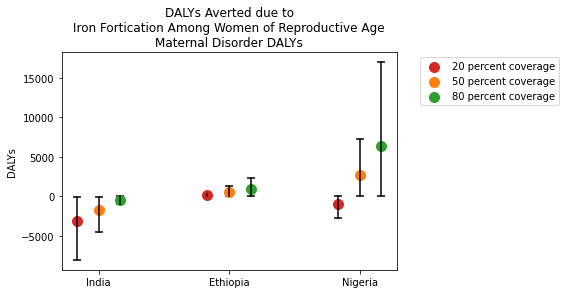

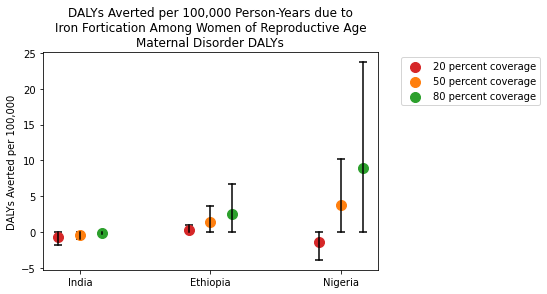

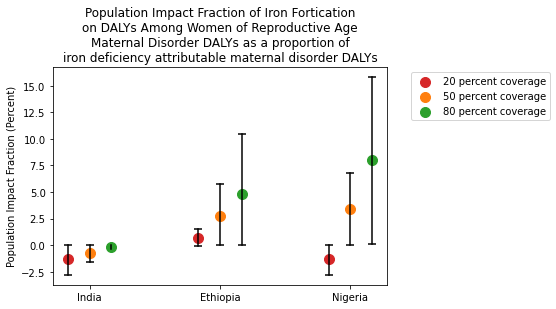

In [33]:
make_india_ethiopia_nigeria_plots(
    maternal_counts_averted,
    'Iron', 
    'counts', 
    coverage_levels, 'Maternal Disorder DALYs', True)
make_india_ethiopia_nigeria_plots(
    maternal_rates_averted,
    'Iron', 
    'rates',
    coverage_levels, 'Maternal Disorder DALYs', True)
make_india_ethiopia_nigeria_plots(
    maternal_disorders_pif,
    'Iron', 
    'pifs',
    coverage_levels, 'Maternal Disorder DALYs as a proportion of\niron deficiency attributable maternal disorder DALYs',True)

# OVERALL

In [34]:
overall_counts_averted = anemia_counts_averted + maternal_counts_averted
overall_rates_averted = anemia_rates_averted + maternal_rates_averted
overall_counts_averted.head()

draw                                    draw_0        draw_1       draw_10  \
location_id coverage_level year                                              
163         0.2            2021       0.000000      0.000000      0.000000   
                           2022  -30077.250310 -15820.200907 -16422.764135   
                           2023 -120726.112273 -63396.314652 -65812.692867   
                           2024 -120726.112273 -63396.314652 -65812.692867   
                           2025 -120726.112273 -63396.314652 -65812.692867   

draw                                 draw_100       draw_101       draw_102  \
location_id coverage_level year                                               
163         0.2            2021      0.000000       0.000000       0.000000   
                           2022  -9940.505314  -28662.924879  -27821.643188   
                           2023 -39806.365793 -115021.977900 -111639.031387   
                           2024 -39806.365793 -115021.977900 -111639.031387   
                           2025 -39806.365793 -115021.977900 -111639.031387   

draw                                 draw_103      draw_104      draw_105  \
location_id coverage_level year                                             
163         0.2            2021      0.000000      0.000000      0.000000   
                           2022  -5907.825716 -17679.856751 -16357.075930   
                           2023 -23647.599265 -70862.710379 -65551.141823   
                           2024 -23647.599265 -70862.710379 -65551.141823   
                           2025 -23647.599265 -70862.710379 -65551.141823   

draw                                  draw_106  ...      draw_990  \
location_id coverage_level year                 ...                 
163         0.2            2021       0.000000  ...      0.000000   
                           2022  -40615.363876  ... -19256.484135   
                           2023 -163221.143411  ... -77200.867978   
                           2024 -163221.143411  ... -77200.867978   
                           2025 -163221.143411  ... -77200.867978   

draw                                 draw_991       draw_992       draw_993  \
location_id coverage_level year                                               
163         0.2            2021      0.000000       0.000000       0.000000   
                           2022 -20684.585609  -35500.639083  -37868.206708   
                           2023 -82928.565634 -142567.435896 -152119.289628   
                           2024 -82928.565634 -142567.435896 -152119.289628   
                           2025 -82928.565634 -142567.435896 -152119.289628   

draw                                 draw_994       draw_995       draw_996  \
location_id coverage_level year                                               
163         0.2            2021      0.000000       0.000000       0.000000   
                           2022 -12131.698474  -29760.982984  -28232.459895   
                           2023 -48594.596130 -119448.793302 -113292.593942   
                           2024 -48594.596130 -119448.793302 -113292.593942   
                           2025 -48594.596130 -119448.793302 -113292.593942   

draw                                 draw_997      draw_998      draw_999  
location_id coverage_level year                                            
163         0.2            2021      0.000000      0.000000      0.000000  
                           2022 -15619.411659 -11980.429531 -15179.658425  
                           2023 -62590.277155 -47986.606422 -60824.066191  
                           2024 -62590.277155 -47986.606422 -60824.066191  
                           2025 -62590.277155 -47986.606422 -60824.066191  

[5 rows x 1000 columns]

In [35]:
overall_pif = overall_rates_averted / ((ira_ylds + iron_attributable_maternal_disorder_burden) * 100_000) * 100
overall_pif.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
                           2022 -0.033317 -0.018576 -0.023347 -0.011684   
                           2023 -0.133729 -0.074438 -0.093562 -0.046788   
                           2024 -0.133729 -0.074438 -0.093562 -0.046788   
                           2025 -0.133729 -0.074438 -0.093562 -0.046788   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
                           2022 -0.040649 -0.034415 -0.006663 -0.025792   
                           2023 -0.163121 -0.138095 -0.026671 -0.103378   
                           2024 -0.163121 -0.138095 -0.026671 -0.103378   
                           2025 -0.163121 -0.138095 -0.026671 -0.103378   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
163         0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
                           2022 -0.017869 -0.069891  ... -0.027777 -0.024465   
                           2023 -0.071609 -0.280872  ... -0.111358 -0.098085   
                           2024 -0.071609 -0.280872  ... -0.111358 -0.098085   
                           2025 -0.071609 -0.280872  ... -0.111358 -0.098085   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
                           2022 -0.042548 -0.050225 -0.015663 -0.035842   
                           2023 -0.170870 -0.201758 -0.062738 -0.143856   
                           2024 -0.170870 -0.201758 -0.062738 -0.143856   
                           2025 -0.170870 -0.201758 -0.062738 -0.143856   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
163         0.2            2021  0.000000  0.000000  0.000000  0.000000  
                           2022 -0.069297 -0.023678 -0.018657 -0.023859  
                           2023 -0.278080 -0.094883 -0.074727 -0.095602  
                           2024 -0.278080 -0.094883 -0.074727 -0.095602  
                           2025 -0.278080 -0.094883 -0.074727 -0.095602  

[5 rows x 1000 columns]

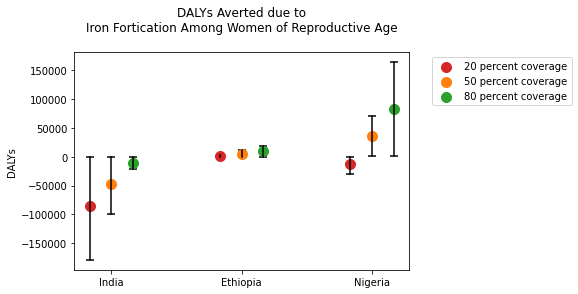

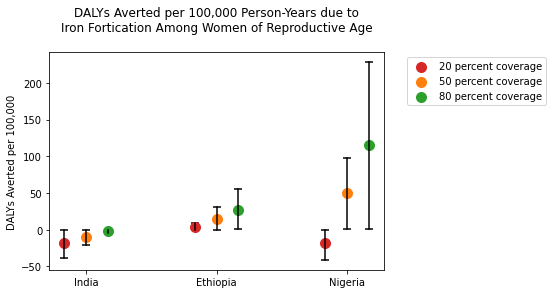

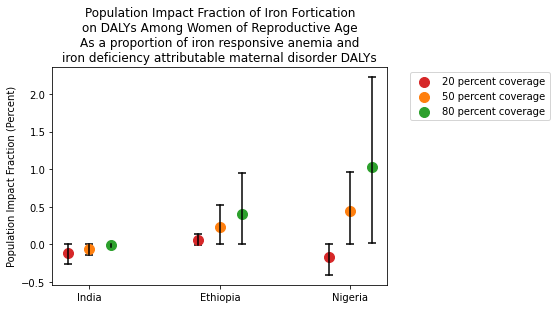

In [37]:
make_india_ethiopia_nigeria_plots(
    overall_counts_averted,
    'Iron', 
    'counts', 
    coverage_levels, 
    '', 
    True)
make_india_ethiopia_nigeria_plots(
    overall_rates_averted,
    'Iron', 
    'rates',
    coverage_levels, 
    '', 
    True)
make_india_ethiopia_nigeria_plots(
    overall_pif,
    'Iron', 
    'pifs',
    coverage_levels, 
    'As a proportion of iron responsive anemia and\niron deficiency attributable maternal disorder DALYs', 
    True)